# House Price Prediction | An End-to-End Machine Learning Project

## Introduction

Thousands of houses are sold everyday. There are some questions every buyer asks himself like: What is the actual price that this house deserves? Am I paying a fair price? In this paper, a machine learning model is proposed to predict a house price based on data related to the house (its size, the year it was built in, etc.). During the development and evaluation of our model, we will show the code used for each step followed by its output. This will facilitate the reproducibility of our work. In this study, Python programming language with a number of Python packages will be used.

## Goals of the Study

The main objectives of this study are as follows:

- To apply data preprocessing and preparation techniques in order to obtain clean data
- To build machine learning models able to predict house price based on house features
- To analyze and compare models performance in order to choose the best model


## Data Preparation

In this study, we will use a housing dataset presented by De Cock (2011). This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price. We obtained a csv copy of the data from https://www.kaggle.com/prevek18/ames-housing-dataset.

## Data Description

The dataset contains `2930` records (rows) and `82` features (columns).

Here, we will provide a brief description of dataset features. Since the number of features is large (82), we will attach the original data description file to this paper for more information about the dataset (It can be downloaded also from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Now, we will mention the feature name with a short description of its meaning.

|Feature|Description|
|-------|-----------|
|MSSubClass| The type of the house involved in the sale|
|MSZoning| The general zoning classification of the sale|
|LotFrontage| Linear feet of street connected to the house|
|LotArea| Lot size in square feet|
|Street| Type of road access to the house|
|Alley| Type of alley access to the house|
|LotShape| General shape of the house|
|LandContour| House flatness|
|Utilities| Type of utilities available|
|LotConfig| Lot configuration|
|LandSlope| House Slope|
|Neighborhood| Locations within Ames city limits|
|Condition1| Proximity to various conditions|
|Condition2| Proximity to various conditions (if more than one is present)|
|BldgType| House type|
|HouseStyle| House style|
|OverallQual| Overall quality of material and finish of the house|
|OverallCond| Overall condition of the house|
|YearBuilt| Construction year|
|YearRemodAdd| Remodel year (if no remodeling nor addition, same as YearBuilt)|
|RoofStyle| Roof type|
|RoofMatl| Roof material|
|Exterior1st| Exterior covering on house|
|Exterior2nd| Exterior covering on house (if more than one material)|
|MasVnrType| Type of masonry veneer|
|MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Quality of the material on the exterior|
|ExterCond| Condition of the material on the exterior|
|Foundation| Foundation type|
|BsmtQual| Basement height|
|BsmtCond| Basement Condition|
|BsmtExposure| Refers to walkout or garden level walls|
|BsmtFinType1| Rating of basement finished area|
|BsmtFinSF1| Type 1 finished square feet|
|BsmtFinType2| Rating of basement finished area (if multiple types)|
|BsmtFinSF2| Type 2 finished square feet|
|BsmtUnfSF| Unfinished basement area in square feet|
|TotalBsmtSF| Total basement area in square feet|
|Heating| Heating type|
|HeatingQC| Heating quality and condition|
|CentralAir| Central air conditioning|
|Electrical| Electrical system type|
|1stFlrSF| First floor area in square feet|
|2ndFlrSF| Second floor area in square feet|
|LowQualFinSF| Low quality finished square feet in all floors|
|GrLivArea| Above-ground living area in square feet|
|BsmtFullBath| Basement full bathrooms|
|BsmtHalfBath| Basement half bathrooms|
|FullBath| Full bathrooms above ground|
|HalfBath| Half bathrooms above ground|
|Bedroom| Bedrooms above ground|
|Kitchen| Kitchens above ground|
|KitchenQual| Kitchen quality|
|TotRmsAbvGrd| Total rooms above ground (excluding bathrooms)|
|Functional| Home functionality|
|Fireplaces| Number of fireplaces|
|FireplaceQu| Fireplace quality|
|GarageType| Garage location|
|GarageYrBlt| Year garage was built in|
|GarageFinish| Interior finish of the garage|
|GarageCars| Size of garage (in car capacity)|
|GarageArea| Garage size in square feet|
|GarageQual| Garage quality|
|GarageCond| Garage condition|
|PavedDrive| How driveway is paved|
|WoodDeckSF| Wood deck area in square feet|
|OpenPorchSF| Open porch area in square feet|
|EnclosedPorch| Enclosed porch area in square feet|
|3SsnPorch| Three season porch area in square feet|
|ScreenPorch| Screen porch area in square feet|
|PoolArea| Pool area in square feet|
|PoolQC| Pool quality|
|Fence| Fence quality|
|MiscFeature| Miscellaneous feature|
|MiscVal| Value of miscellaneous feature|
|MoSold| Sale month|
|YrSold| Sale year|
|SaleType| Sale type|
|SaleCondition| Sale condition|

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style="ticks")
plt.rc('figure', figsize=(6, 3.7), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", 
       linewidth=0.4, grid=True, labelsize=10)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)

## Importing Dataset & Exploration

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("AmesHousing.csv")

In [3]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

- Our Data set contains 82 columns and from above we can see there are lot of columns with null values
- let's see the statistic analysis of our data for both numeric as well as categorical attributes

In [5]:
dataset.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Order,1.465500e+03,8.459625e+02,1.0,1465.5,2.930000e+03
PID,7.144645e+08,1.887308e+08,526301100.0,535453620.0,1.007100e+09
MS SubClass,5.738737e+01,4.263802e+01,20.0,50.0,1.900000e+02
Lot Frontage,6.922459e+01,2.336533e+01,21.0,68.0,3.130000e+02
Lot Area,1.014792e+04,7.880018e+03,1300.0,9436.5,2.152450e+05
Overall Qual,6.094881e+00,1.411026e+00,1.0,6.0,1.000000e+01
Overall Cond,5.563140e+00,1.111537e+00,1.0,5.0,9.000000e+00
Year Built,1.971356e+03,3.024536e+01,1872.0,1973.0,2.010000e+03
Year Remod/Add,1.984267e+03,2.086029e+01,1950.0,1993.0,2.010000e+03
Mas Vnr Area,1.018968e+02,1.791126e+02,0.0,0.0,1.600000e+03


From the table above, we can see, for example, that the average lot area of the houses in our dataset is 10,147.92 ft<sup>2</sup> with a standard deviation of 7,880.02 ft<sup>2</sup>. We can see also that the minimum lot area is 1,300 ft<sup>2</sup> and the maximum lot area is 215,245 ft<sup>2</sup> with a median of 9,436.5 ft<sup>2</sup>. Similarly, we can get a lot of information about our dataset variables from the table.
In the table we got, `count` represents the number of non-null values in each column, `unique` represents the number of unique values, `top` represents the most frequent element, and `freq` represents the frequency of the most frequent element.

In [6]:
dataset.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
MS Zoning,7,RL,2273
Street,2,Pave,2918
Alley,2,Grvl,120
Lot Shape,4,Reg,1859
Land Contour,4,Lvl,2633
Utilities,3,AllPub,2927
Lot Config,5,Inside,2140
Land Slope,3,Gtl,2789
Neighborhood,28,NAmes,443
Condition 1,9,Norm,2522


In the table we got, `count` represents the number of non-null values in each column, `unique` represents the number of unique values, `top` represents the most frequent element, and `freq` represents the frequency of the most frequent element.

## Data Cleaning

### Dealing with Missing Values

We should deal with the problem of missing values because some machine learning models don't accept data with missing values. Firstly, let's see the number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [7]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Cond,159,5.426621
Garage Qual,159,5.426621
Garage Finish,159,5.426621
Garage Yr Blt,159,5.426621


Now we start dealing with these missing values.

##### Pool QC

The percentage of missing values in `Pool QC` column is 99.56% which is very high. We think that a missing value in this column denotes that the corresponding house doesn't have a pool. To verify this, let's take a look at the values of `Pool Area` column:

In [8]:
dataset["Pool Area"].value_counts()

0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: Pool Area, dtype: int64

We can see that there are 2917 entries in `Pool Area` column that have a value of 0. This verfies our hypothesis that each house without a pool has a missing value in `Pool QC` column and a value of 0 in `Pool Area` column. So let's fill the missing values in `Pool QC` column with `"No Pool"`:

In [9]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

##### Misc Feature

The percentage of missing values in Pool QC column is 96.38% which is very high also. Let's take a look at the values of `Misc Val` column:

In [10]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
1200        3
650         3
480         2
3000        2
2500        2
4500        2
455         1
1512        1
17000       1
1000        1
15500       1
460         1
8300        1
1300        1
560         1
620         1
900         1
1150        1
6500        1
1400        1
750         1
800         1
12500       1
350         1
490         1
80          1
54          1
3500        1
300         1
420         1
Name: Misc Val, dtype: int64

We can see that `Misc Val` column has 2827 entries with a value of 0. `Misc Feature` has 2824 missing values. Then, as with `Pool QC`, we can say that each house without a "miscellaneous feature" has a missing value in `Misc Feature` column and a value of 0 in `Misc Val` column. So let's fill the missing values in `Misc Feature` column with `"No Feature"`:

In [11]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

##### Alley,  Fence, and Fireplace Qu

According to the dataset documentation, `NA` in `Alley`, `Fence`, and `Fireplace Qu` columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with `"No Alley"`, `"No Fence"`, and `"No Fireplace"` accordingly:

In [12]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

##### Lot Frontage

As we saw previously, `Lot Frontage` represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0:

In [13]:
dataset['Lot Frontage'].fillna(0, inplace=True)

##### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

According to the dataset documentation, `NA` in `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Type` indicates that there is no garage in the house. So we fill in the missing values in these columns with `"No Garage"`. We notice that `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Yr Blt` columns have 159 missing values, but `Garage Type` has 157 and both `Garage Cars` and `Garage Area` have one missing value. Let's take a look at the row that contains the missing value in `Garage Cars`:

In [14]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


We can see that this is the same row that contains the missing value in `Garage Area`, and that all garage columns except `Garage Type` are null in this row, so we will fill the missing values in `Garage Cars` and `Garage Area` with 0.

We saw that there are 2 rows where `Garage Type` is not null while `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Yr Blt` columns are null. Let's take a look at these two rows:

In [15]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


We will replace the values of `Garage Type` with `"No Garage"` in these two rows also.

For `Garage Yr Blt`, we will fill in missing values with 0 since this is a numerical column:

In [16]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
    
dataset['Garage Yr Blt'].fillna(0, inplace=True)

##### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1


According to the dataset documentation, `NA` in any of the first five of these columns indicates that there is no basement in the house. So we fill in the missing values in these columns with `"No Basement"`. We notice that the first five of these columns have 80 missing values, but `BsmtFin Type 2` has 81, `Bsmt Exposure` has 83, `Bsmt Half Bath` and `Bsmt Full Bath` each has 2, and each of the others has 1. Let's take a look at the rows where `Bsmt Half Bath` is null:

In [17]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


We can see that these are the same rows that contain the missing values in `Bsmt Full Bath`, and that one of these two rows is contains the missing value in each of `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns. We notice also that `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are null in these rows, so we will fill the missing values in `Bsmt Half Bath`, `Bsmt Full Bath`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns with 0.

We saw that there are 3 rows where `Bsmt Exposure` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null. Let's take a look at these three rows:

In [18]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1796,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
2779,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


We will fill in the missing values in `Bsmt Exposure` for these three rows with `"No"`. According to the dataset documentation, `"No"` for `Bsmt Exposure` means "No Exposure":

Let's now take a look at the row where `BsmtFin Type 2` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null:

In [19]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


We will fill in the missing value in `BsmtFin Type 2` for this row with `"Unf"`. According to the dataset documentation, `"Unf"` for `BsmtFin Type 2` means "Unfinished":

In [20]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

##### Mas Vnr Area and Mas Vnr Type

Each of these two columns have 23 missing values. We will fill in these missing values with `"None"` for `Mas Vnr Type` and with 0 for `Mas Vnr Area`. We use `"None"` for `Mas Vnr Type` because in the dataset documentation, `"None"` for `Mas Vnr Type` means "None" (i.e. no masonry veneer):

In [21]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

##### Electrical

This column has one missing value. We will fill in this value with the mode of this column:

In [22]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Now let's check if there is any remaining missing value in our dataset:

In [23]:
dataset.isna().values.sum()

0

## Deleting Some Unimportant Columns

We will delete columns that are not useful in our analysis. The columns to be deleted are `Order` and `PID`:

In [24]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

## Exploratory Data Analysis

#### Target Variable Distribution

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3.

<Axes: xlabel='SalePrice'>

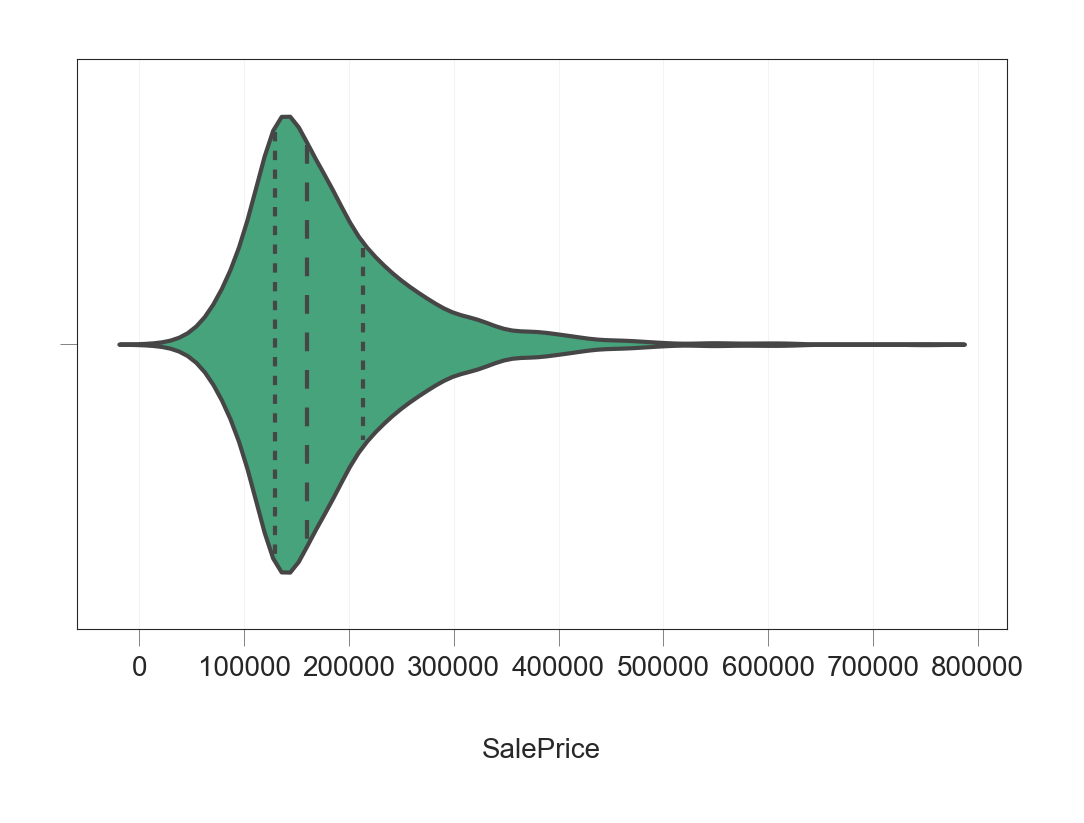

In [25]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E")

#### Correlation Between Variables

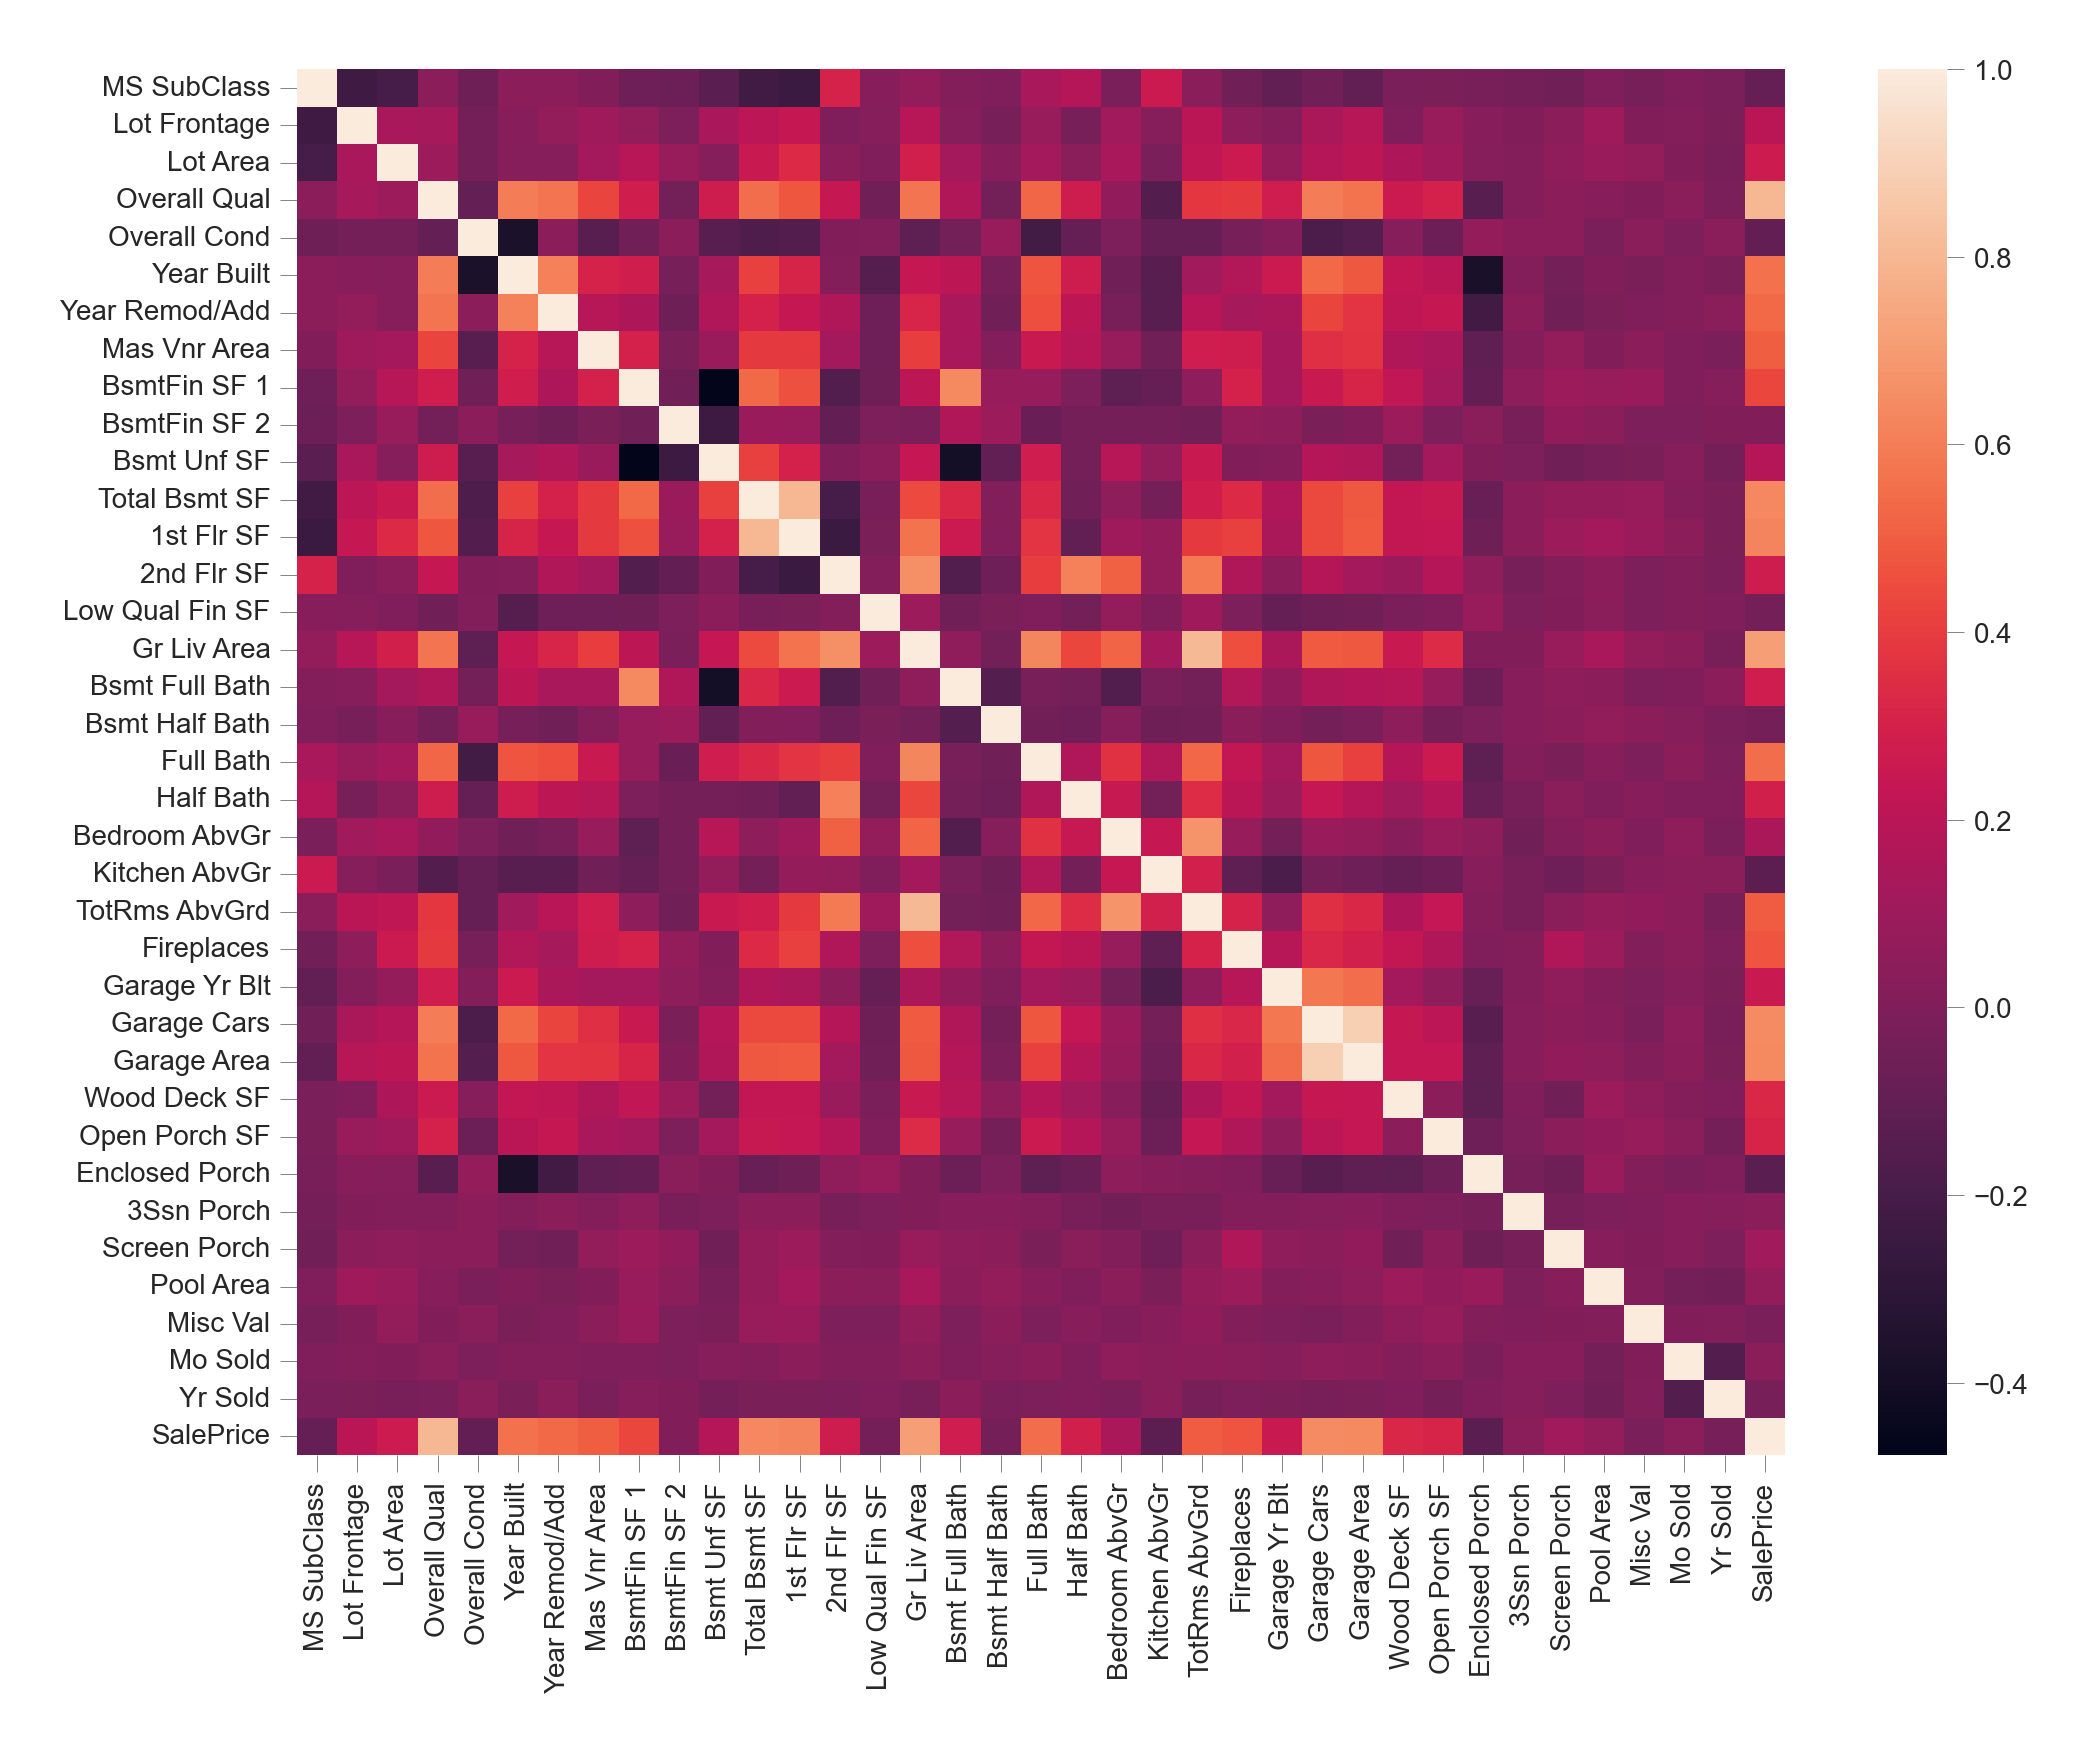

In [26]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

We can see that there are many correlated variables in our dataset. We notice that `Garage Cars` and `Garage Area` have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that `Gr Liv Area` and `TotRms AbvGrd` are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too. 

Regarding negative correlation, we can see that `Bsmt Unf SF` is negatively correlated with `BsmtFin SF 1`, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that `Bsmt Unf SF` is negatively correlated with `Bsmt Full Bath` which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (`SalePrice`). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with `Overall Qual` and `Gr Liv Area`. We see also that the target variable is positively correlated with `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`.


## Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

### Creating New Derived Features

Firstly, we noticed a high positive correlation between the target variable `SalePrice` and each of `Overall Qual` and `Gr Liv Area`. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create polynomial features out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

In [27]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

Also, we noticed that there are some predictor features that are highly correlated with each other. To avoid the [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) problem, we will delete one feature from each pair of highly correlated predictors. We have two pairs: the first consists of `Garage Cars` and `Garage Area`, and the other consists of `Gr Liv Area` and `TotRms AbvGrd`. For the first pair, we will remove `Garage Cars` feature; from the second pair, we will remove `TotRms AbvGrd` feature:

In [28]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

### Dealing with Ordinal Variables

There are some ordinal features in our dataset. For example, the `Bsmt Cond` feature has the following possible values: 

In [29]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. So to solve this issue, we will map each one of the possible values of this feature to a number. We will map `"No Basement"` to 0, `"Po"` to 1, `"Fa"` to 2, `"TA"` to 3, `"Gd"` to 4, and `"Ex"` to 5.

The ordinal features in the dataset are: `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Central Air`, `Kitchen Qual`, `Functional`, `Fireplace Qu`, `GarageFinish`, `Garage Qual`, `Garage Cond`, `Pool QC`, `Land Slope` and `Fence`. We will map the values of each of them to corresponding numbers as described for `Bsmt Cond` above and in accordance with the dataset documentation:

In [30]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

### One-Hot Encoding For Categorical Features

Machine learning models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in order for our dataset to be suitable for modeling. We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable; each of the resulting binary variables has only 0 and 1 as its possible values. Pandas package provides a convenient function `get_dummies()` that can be used for performing one-hot encoding on our dataset.



In [31]:
# Select the object (string) columns
mask = dataset.dtypes == np.object
categorical_cols = dataset.columns[mask]

In [32]:
# Determine how many extra columns would be created
num_ohc_cols = (dataset[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 162 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

162

In [33]:
dataset1 = dataset.copy()

In [34]:
dataset = pd.get_dummies(dataset)

In [35]:
# Column difference is as calculated above
dataset.shape[1] - dataset1.shape[1]

162

All categorical column are converted.

Now, after we have cleaned and prepared our dataset, it is ready for modeling.

## Model Building and Evaluation

In this part, we will build our prediction model: we will choose algorithms for each of the techniques we mentioned in the previous section. After we build the model, we will evaluate its performance and results.
 

In [36]:
import numpy as np                   # Numerical operations
import pandas as pd                  # Data manipulation and analysis
import matplotlib.pyplot as plt      # Data visualization
from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.linear_model import LinearRegression     # Simple linear regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler   # Data scaling
from sklearn.feature_selection import RFE              # Recursive Feature Elimination
from sklearn.linear_model import Ridge, Lasso, ElasticNet    # Regularization techniques
from sklearn.model_selection import cross_val_score   # Cross-validation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error    # Evaluation metrics

#### Splitting dataset

In [37]:
X = dataset.loc[:, dataset.columns != "SalePrice"]
y = dataset["SalePrice"]

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, random_state=42)

#### Feature Scaling

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Simple Linear Regression

In [40]:
LR = LinearRegression()
LR = LR.fit(X_train,y_train)
X_test = scaler.transform(X_test)
y_test_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)

In [41]:
print("Mean Squared Error (MSE) on train data:", mean_squared_error(y_train, y_train_pred))
print("R2 Score on train data:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) on test data:", mean_squared_error(y_test, y_test_pred))
print("R2 Score on train data: on test data:", r2_score(y_test, y_test_pred))


Mean Squared Error (MSE) on train data: 331844460.534504
R2 Score on train data: 0.945472117596062
Mean Squared Error (MSE) on test data: 7.561754938640872e+28
R2 Score on train data: on test data: -1.0757283556302012e+19


As we can see above our model has predicted very well on our train data but on unknown data it miserably failed. It's a clear case of overfitting.

Let's apply RFE method to deal with this overfitting.

## RFE


In [42]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the range of feature subset sizes to evaluate
num_features_range = range(10, X_train.shape[1] + 1, 50)

# Initialize lists to store mean cross-validation scores
mean_scores = []

# Create an instance of the LinearRegression model
model = LinearRegression()

# Perform cross-validation for each feature subset size
for num_features in num_features_range:
    # Create an instance of RFE with the specified number of features
    rfe = RFE(model, n_features_to_select=num_features)
    
    # Fit RFE on the training data
    rfe.fit(X_train, y_train)
    
    # Subset the training data with the selected features
    X_train_selected = X_train[:, rfe.support_]
    
    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    mean_scores.append(np.mean(scores))

# Create a DataFrame to store the results
results_df = pd.DataFrame({"Number of Features": num_features_range,
                           "Mean Cross-Validation Score": mean_scores})

# Sort the DataFrame by the mean cross-validation score in descending order
results_df.sort_values(by="Mean Cross-Validation Score", ascending=False, inplace=True)

# Print the top 5 rows of the DataFrame
print(results_df.head())

# Get the best number of features
best_num_features = results_df.iloc[0]["Number of Features"]
print("Best number of features:", best_num_features)


   Number of Features  Mean Cross-Validation Score
0                  10                -3.464406e+25
4                 210                -3.528298e+25
2                 110                -3.693361e+26
3                 160                -5.019650e+26
1                  60                -1.507095e+27
Best number of features: 10.0


A negative mean cross-validation score suggests that the model is performing worse than a naive baseline model that simply predicts the mean or median of the target variable. It indicates that the model is not able to capture the underlying patterns and relationships in the data effectively.

So RFE is of no use.

Thus let's try different Regularization method,



### LASSO Regression:

In [242]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Define the hyperparameters and their corresponding values to search
param_grid = {
    'alpha': [0.1, 1, 10, 50, 100, 500, 1000, 1500, 2000, 2500],  # Values to search for the regularization parameter alpha
    'fit_intercept': [True, False],  # Values to search for the fit_intercept parameter
    'max_iter': [1000, 2000, 3000]
}

# Create an instance of the Lasso regression model
lasso = Lasso()

# Create an instance of GridSearchCV with the Lasso model and the parameter grid
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
lbest_params = grid_search.best_params_

# Initialize lists to store results for each alpha value
lsparsity = []
lstability = []
lmse = []
lr2_scores = []
lcv_scores = []

# Iterate over each alpha value in the param_grid
for alpha in param_grid['alpha']:
    # Create an instance of the Lasso model with the current alpha value
    model_lasso = Lasso(**best_params)
    
    # Set the alpha value for the Lasso model
    model_lasso.set_params(alpha=alpha)
    
    # Perform cross-validation and calculate the mean score
    cv_score = np.mean(cross_val_score(model_lasso, X_train, y_train, cv=5))
    lcv_scores.append(cv_score)
    
    # Fit the Lasso model on the training data
    model_lasso.fit(X_train, y_train)
    
    # Get the coefficients of the Lasso model
    coefficients = model_lasso.coef_
    
    # Calculate the sparsity of the model
    lsparsity.append(np.sum(coefficients == 0) / len(coefficients))
    
    # Predict the target variable for the test data
    y_pred = model_lasso.predict(X_test)
    
    # Calculate the mean squared error (MSE)
    lmse.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the R2 score
    lr2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate the stability of the model
    lstability.append(np.sum(coefficients != 0) / len(coefficients))

# Print the results for each alpha value
for i, alpha in enumerate(param_grid['alpha']):
    print(f"Alpha: {alpha}")
    print(f"Sparsity: {lsparsity[i]}")
    print(f"Stability: {lstability[i]}")
    print(f"MSE: {lmse[i]}")
    print(f"R2 Score: {lr2_scores[i]}")
    print(f"Cross-Validation Score: {lcv_scores[i]}")
    print()

# Print the best hyperparameter values
print("Best hyperparameters:", lbest_params)

Alpha: 0.1
Sparsity: 0.045081967213114756
Stability: 0.9549180327868853
MSE: 964872289.4954513
R2 Score: 0.8627381487770555
Cross-Validation Score: 0.7468550187456241

Alpha: 1
Sparsity: 0.10245901639344263
Stability: 0.8975409836065574
MSE: 963519040.896513
R2 Score: 0.862930660687572
Cross-Validation Score: 0.7478904653988585

Alpha: 10
Sparsity: 0.14344262295081966
Stability: 0.8565573770491803
MSE: 947942087.9193625
R2 Score: 0.8651466238003425
Cross-Validation Score: 0.7573595975674634

Alpha: 50
Sparsity: 0.21721311475409835
Stability: 0.7827868852459017
MSE: 910081708.3391758
R2 Score: 0.8705326068426136
Cross-Validation Score: 0.7811768043282673

Alpha: 100
Sparsity: 0.29508196721311475
Stability: 0.7049180327868853
MSE: 900836900.1353526
R2 Score: 0.8718477648195531
Cross-Validation Score: 0.7856340142140322

Alpha: 500
Sparsity: 0.5737704918032787
Stability: 0.4262295081967213
MSE: 864586138.9883357
R2 Score: 0.8770047650126899
Cross-Validation Score: 0.7978214447911988

Alph

- From Above we can see, with increase in alpha, the sparsity of our model has increased. That suggest the variance of our model is decreasing and the biasness is increasing.
- We can see the trade-off from MSE and R2 score
- Thus we found that 2000 is the best alpha value for LASSO.
- Around 82% of features co-efficient became zero.

#### Let's visualise the trade-off:

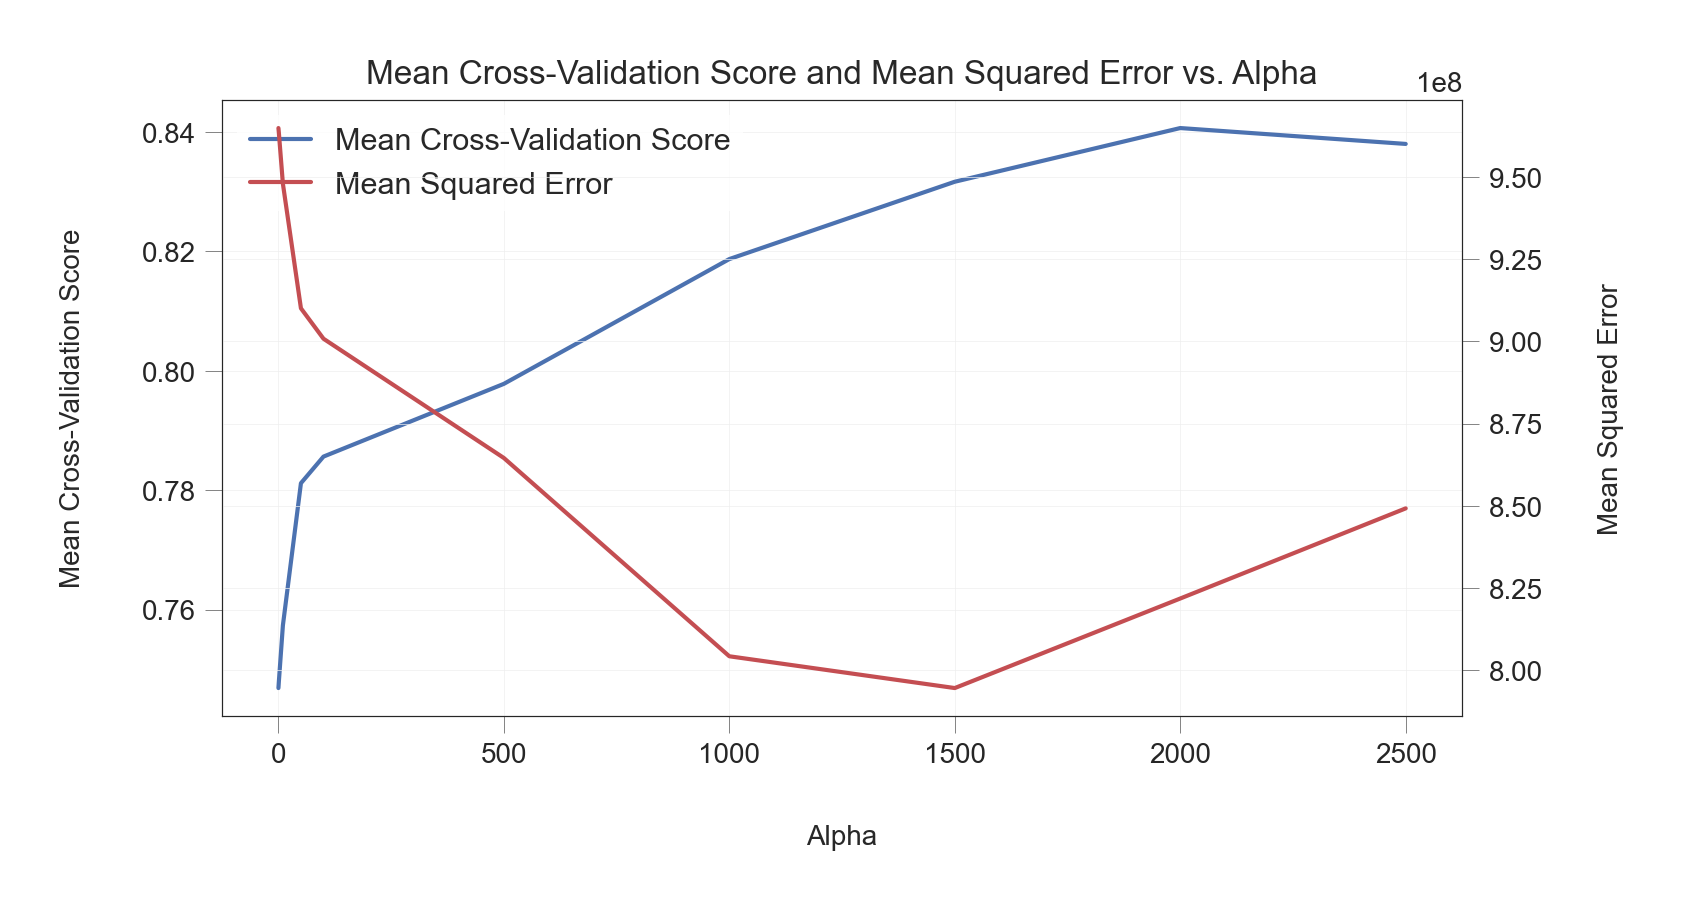

In [243]:
# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

# Plot the mean cross-validation scores against the alpha values
ax1.plot(param_grid["alpha"], lcv_scores, 'b-', label='Mean Cross-Validation Score')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Cross-Validation Score')
ax1.set_title('Mean Cross-Validation Score and Mean Squared Error vs. Alpha')

# Plot the mean squared error against the alpha values
ax2.plot(param_grid["alpha"], lmse, 'r-', label='Mean Squared Error')
ax2.set_ylabel('Mean Squared Error')

# Set legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

From Above graph we can see, 
- The choice of alpha influences the trade-off between bias and variance in the model. A smaller alpha value can lead to higher variance (overfitting) since more features are retained. Conversely, a larger alpha value promotes sparsity and higher bias (underfitting). Striking a balance between bias and variance is crucial.
- The model is finding a balance between reducing bias (improving mean squared error) and controlling variance (maintaining good cross-validation scores).

#### Top Features:

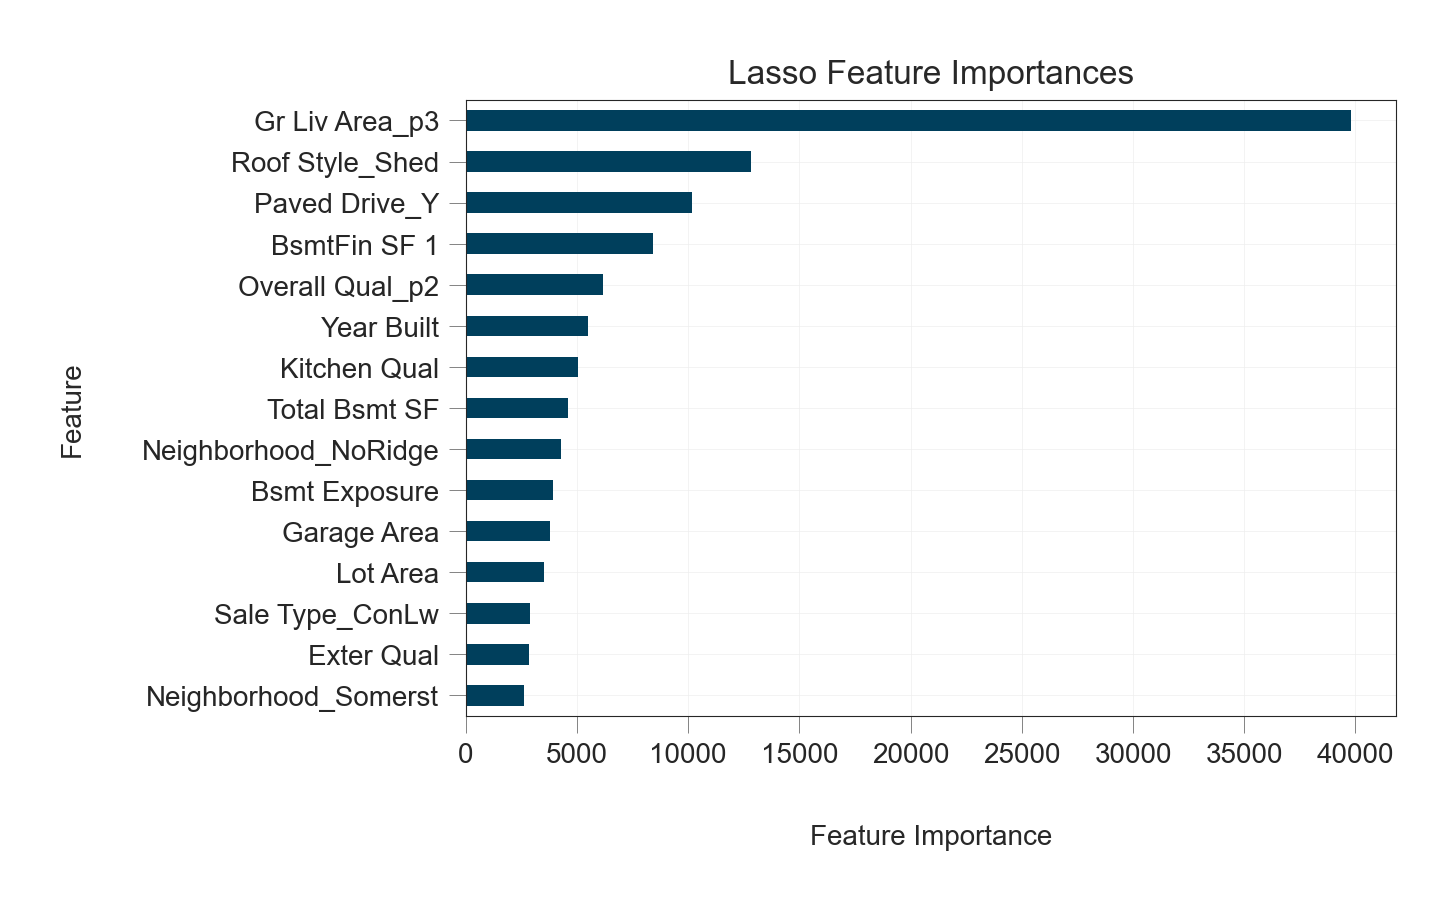

In [244]:
model_lasso = Lasso(**lbest_params)
model_lasso.fit(X_train, y_train)
lBest_y_pred = model_lasso.predict(X_test)
#-----------------------------------------------------------------------------------
coefficients = model_lasso.coef_
coefs = np.abs(coefficients)
nonzero_coefs = coefs[coefs != 0]
X_train_df = pd.DataFrame(X_train,columns = dataset.columns[:-1])
nonzero_features = X_train_df.columns[coefs != 0]
feature_importances = pd.Series(nonzero_coefs, index=nonzero_features)
X = feature_importances.sort_values(ascending=True).tail(15)
#-----------------------------------------------------------------------------------
# Plot the feature importances
plt.figure(figsize=(6, 4))
X.plot(kind='barh', color='#003f5c')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Lasso Feature Importances')
plt.show()

The above graph represents the most important feature of our model.

#### Residual Analysis of the test data

Text(0.5, 0, 'Errors')

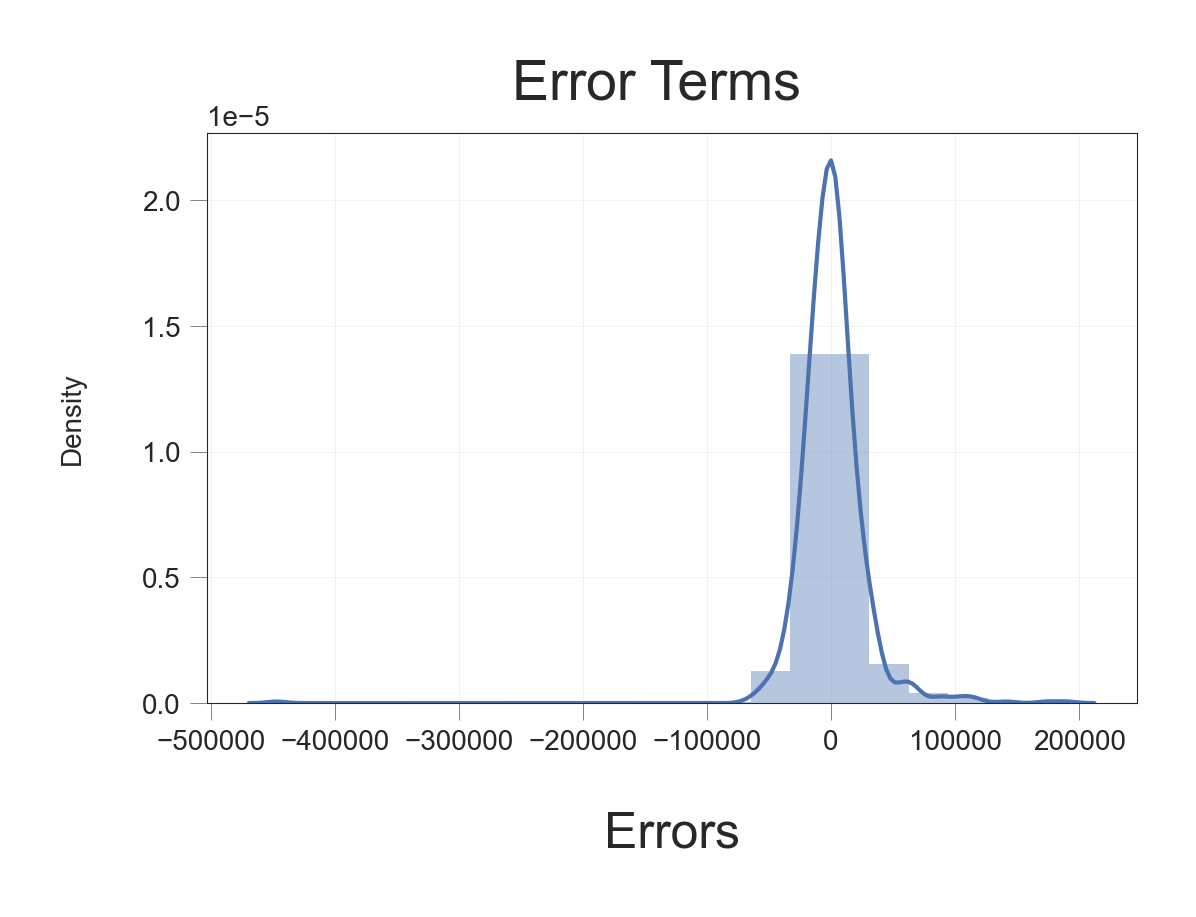

In [245]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-lBest_y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

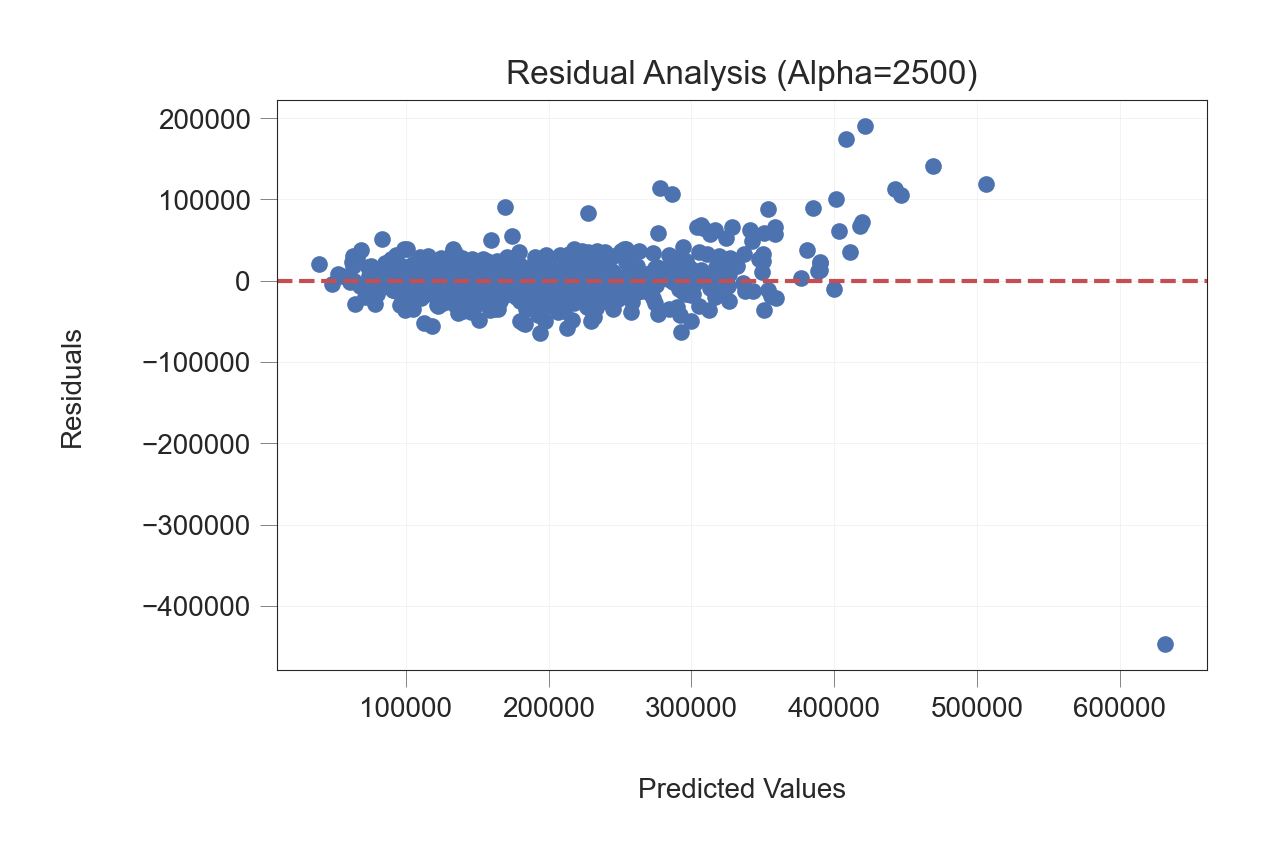

In [248]:
plt.scatter(lBest_y_pred,(y_test-lBest_y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f"Residual Analysis (Alpha={alpha})")
plt.show()

From above analysis we can see, the error terms are moreover normaly distributed and there is not much relation among the residuals.

## Ridge Regression

In [272]:
# Define the hyperparameters and their corresponding values to search
param_grid = {
    'alpha': [0.1, 1, 10, 50, 100, 500, 1000, 1500, 2000, 2500],  # Values to search for the regularization parameter alpha
    'fit_intercept': [True, False],  # Values to search for the fit_intercept parameter
    'max_iter': [1000, 2000, 3000]
}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create an instance of GridSearchCV with the Ridge model and the parameter grid
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
rbest_params = grid_search.best_params_

# Initialize lists to store results for each alpha value
rsparsity = []
rstability = []
rmse = []
rr2_scores = []
rcv_scores = []

# Iterate over each alpha value in the param_grid
for alpha in param_grid['alpha']:
    # Create an instance of the Ridge model with the current alpha value
    model_ridge = Ridge(**rbest_params)
    
    # Set the alpha value for the Ridge model
    model_ridge.set_params(alpha=alpha)
    
    # Perform cross-validation and calculate the mean score
    cv_score = np.mean(cross_val_score(model_ridge, X_train, y_train, cv=5))
    rcv_scores.append(cv_score)
    
    # Fit the Ridge model on the training data
    model_ridge.fit(X_train, y_train)
    
    # Get the coefficients of the Ridge model
    coefficients = model_ridge.coef_
    
    # Calculate the sparsity of the model
    rsparsity.append(np.sum(coefficients == 0) / len(coefficients))
    
    # Predict the target variable for the test data
    y_pred = model_ridge.predict(X_test)
    
    # Calculate the mean squared error (MSE)
    rmse.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the R2 score
    rr2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate the stability of the model
    rstability.append(np.sum(coefficients != 0) / len(coefficients))

# Print the results for each alpha value
for i, alpha in enumerate(param_grid['alpha']):
    print(f"Alpha: {alpha}")
    print(f"Sparsity: {rsparsity[i]}")
    print(f"Stability: {rstability[i]}")
    print(f"MSE: {rmse[i]}")
    print(f"R2 Score: {rr2_scores[i]}")
    print(f"Cross-Validation Score: {rcv_scores[i]}")
    print()

# Print the best hyperparameter values
print("Best hyperparameters:", rbest_params)

Alpha: 0.1
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 975151192.270003
R2 Score: 0.861275881450347
Cross-Validation Score: 0.7342872115064614

Alpha: 1
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 957669279.06963
R2 Score: 0.8637628424657335
Cross-Validation Score: 0.7585710547747198

Alpha: 10
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 916900074.7190461
R2 Score: 0.8695626322648312
Cross-Validation Score: 0.7860647462625432

Alpha: 50
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 871529967.7686075
R2 Score: 0.8760169422683413
Cross-Validation Score: 0.806978582390822

Alpha: 100
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 842741317.0989926
R2 Score: 0.8801123894359539
Cross-Validation Score: 0.8192063995814776

Alpha: 500
Sparsity: 0.02459016393442623
Stability: 0.9754098360655737
MSE: 803843893.970855
R2 Score: 0.885645901346802
Cross-Validation Score: 0.8450101821343605

Alpha: 10

From above we can see,
- The best alpha value for our model is 1000
- However if we see the below graph, instaed of 1000, for 500 value the trade-off is better if we consider interpretibility as well as predictibility.
#### Let's visualise the trade-off:

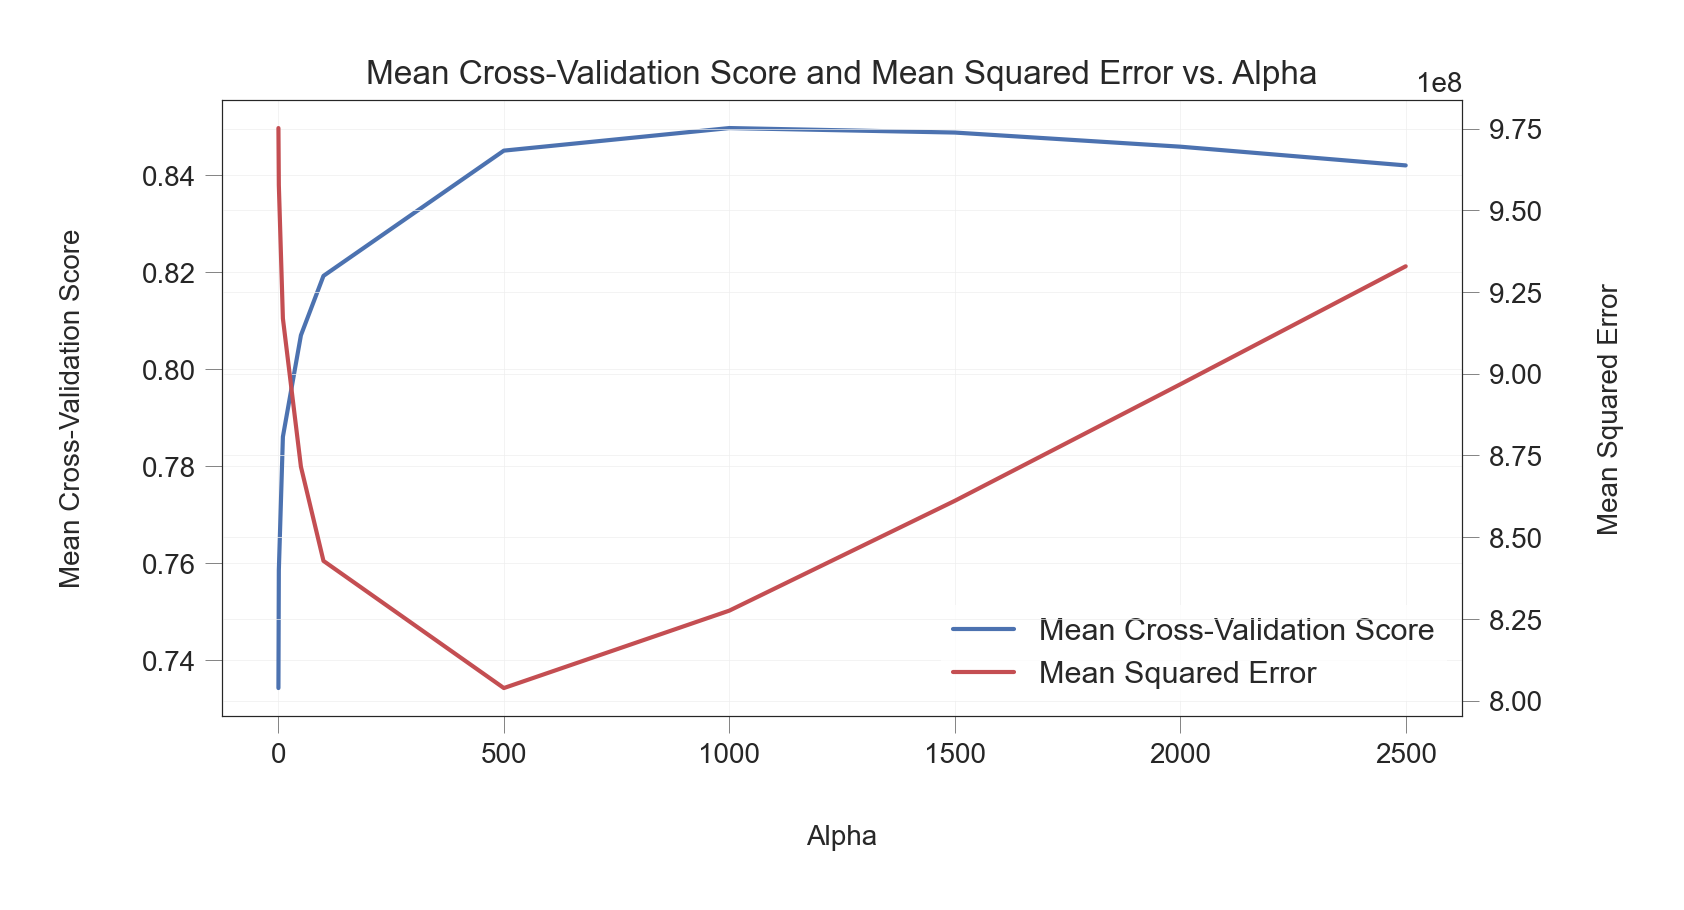

In [251]:
# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

# Plot the mean cross-validation scores against the alpha values
ax1.plot(param_grid["alpha"], rcv_scores, 'b-', label='Mean Cross-Validation Score')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Cross-Validation Score')
ax1.set_title('Mean Cross-Validation Score and Mean Squared Error vs. Alpha')

# Plot the mean squared error against the alpha values
ax2.plot(param_grid["alpha"], rmse, 'r-', label='Mean Squared Error')
ax2.set_ylabel('Mean Squared Error')

# Set legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

#### Top Features

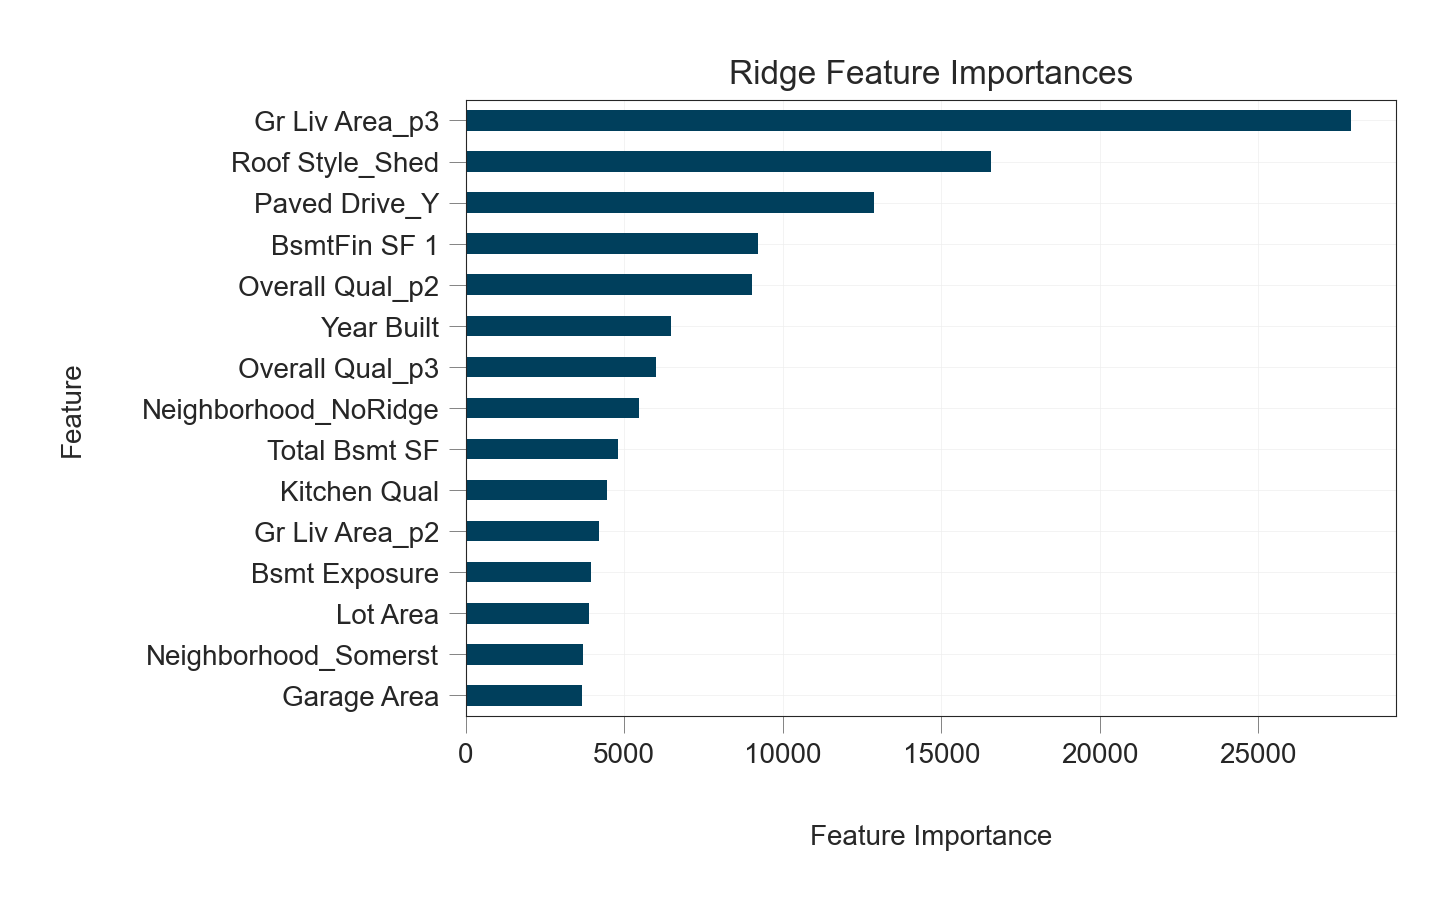

In [252]:
model_ridge = Lasso(**rbest_params)
model_ridge.fit(X_train, y_train)
rBest_y_pred = model_ridge.predict(X_test)

#-----------------------------------------------------
coefficients = model_ridge.coef_
coefs = np.abs(coefficients)
nonzero_coefs = coefs[coefs != 0]
X_train_df = pd.DataFrame(X_train,columns = dataset.columns[:-1])
nonzero_features = X_train_df.columns[coefs != 0]
feature_importances = pd.Series(nonzero_coefs, index=nonzero_features)
X = feature_importances.sort_values(ascending=True).tail(15)
#--------------------------------------------------------------------------
# Plot the feature importances
plt.figure(figsize=(6, 4))
X.plot(kind='barh', color='#003f5c')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Ridge Feature Importances')
plt.show()

Text(0.5, 0, 'Errors')

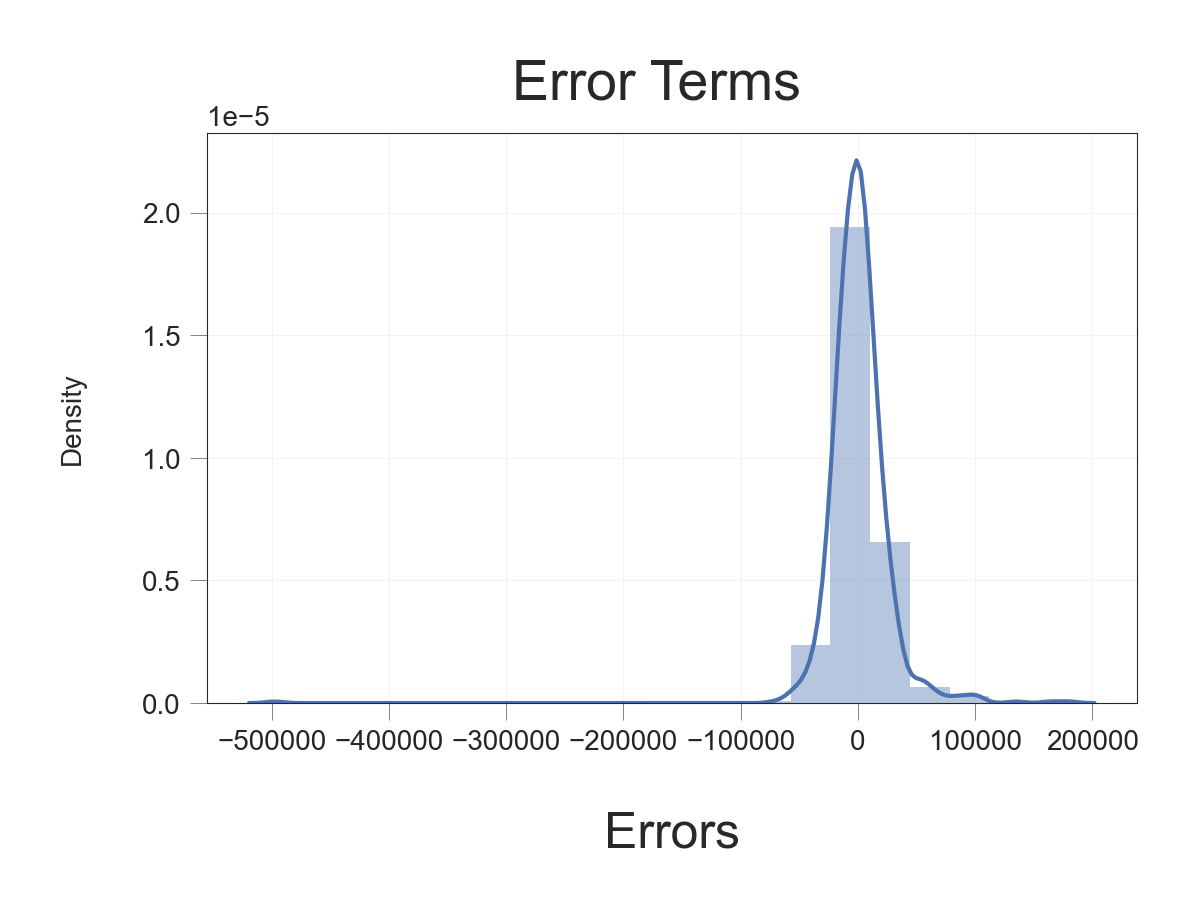

In [253]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-rBest_y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

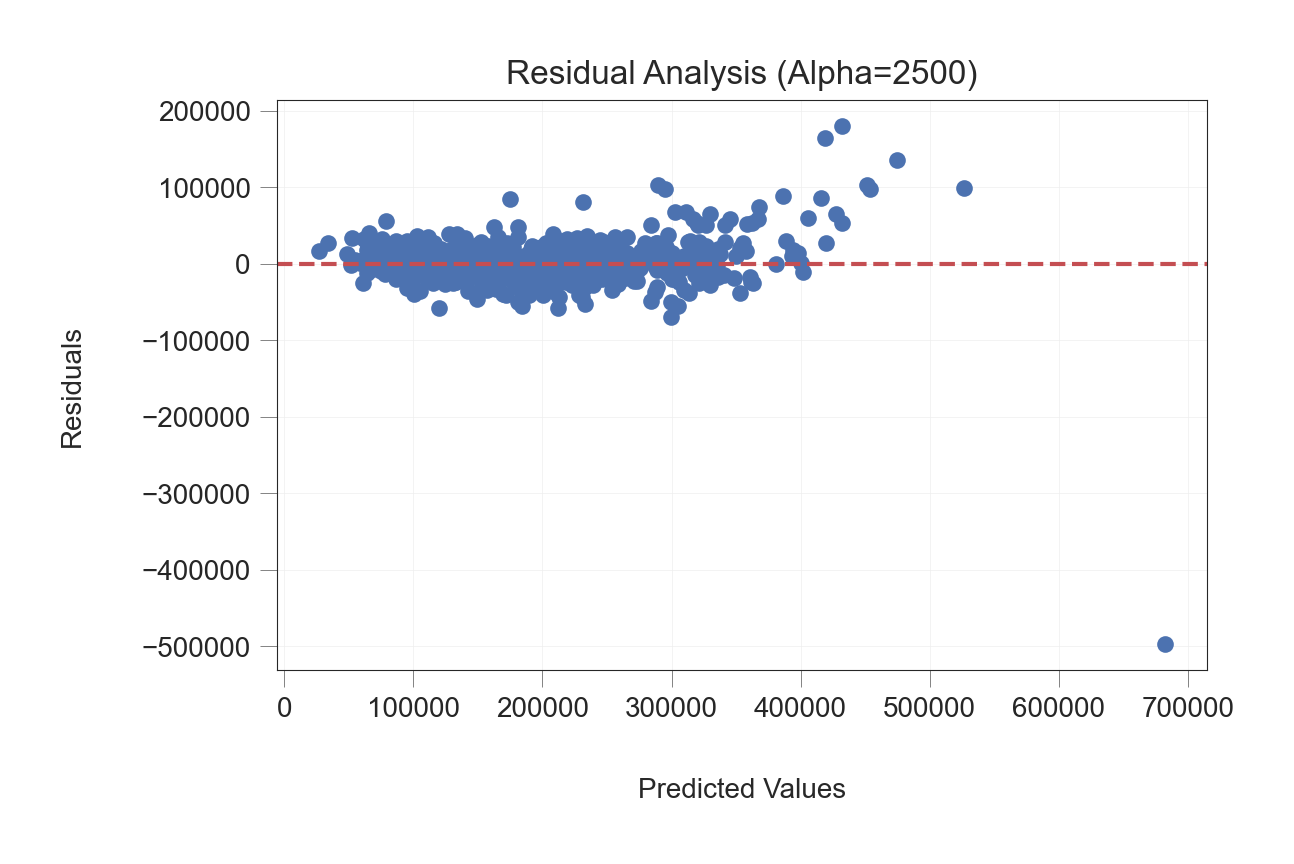

In [254]:
plt.scatter(rBest_y_pred,(y_test-rBest_y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f"Residual Analysis (Alpha={alpha})")
plt.show()

## Comparision and Analysis:

- Compared to LASSO the R2 score and MSE is quiet simillar but the point to note here is,
   1. There is a lot of difference in Sparsity of both the model, in Ridge we don't loose lot of attributes.
   2. Also we can see MSE is bit higher in case of ridge, but considering that a lot of attribbutes has been retained
      the trade-off between Bias and Variance is better comapred to LASSO.

In [276]:
X.index

Index(['Garage Area', 'Neighborhood_Somerst', 'Lot Area', 'Bsmt Exposure',
       'Gr Liv Area_p2', 'Kitchen Qual', 'Total Bsmt SF',
       'Neighborhood_NoRidge', 'Overall Qual_p3', 'Year Built',
       'Overall Qual_p2', 'BsmtFin SF 1', 'Paved Drive_Y', 'Roof Style_Shed',
       'Gr Liv Area_p3'],
      dtype='object')

## Insights/Conclusion:

- So from above analysis and comparision Ridge regression would be the best with best parameters as,
1. with Alpha as 500 / 1000 depending on whether you focus on interpretibility or predicitibility.
2. The most important features are,
['Garage Area', 'Neighborhood_Somerst', 'Lot Area', 'Bsmt Exposure',
       'Gr Liv Area_p2', 'Kitchen Qual', 'Total Bsmt SF',
       'Neighborhood_NoRidge', 'Overall Qual_p3', 'Year Built',
       'Overall Qual_p2', 'BsmtFin SF 1', 'Paved Drive_Y', 'Roof Style_Shed',
       'Gr Liv Area_p3']